# Embed some images using CLIP 

Based on 
https://huggingface.co/blog/image-search-datasets

See also
https://github.com/nalzok/embedder/blob/main/embedder.py


In [3]:
import torch_xla

ModuleNotFoundError: No module named 'torch_xla'

In [4]:
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import einops
import matplotlib
from functools import partial
from collections import namedtuple
import jax
import jax.random as jr
import jax.numpy as jnp
from jax import vmap, grad, jit
import jax.debug
import itertools
from itertools import repeat
from time import time
import torch

from time import time
from rich import inspect
import datasets

# Run scripts

In [5]:
%reload_ext autoreload

In [6]:
from embed_images import *

print(process_with_clip)

<function process_with_clip at 0x7feddea2f910>


In [9]:
file_name = "/home/kpmurphy/data/cats-dogs-resnet-embeddings.hf"

ds2 = datasets.load_from_disk(file_name)
ds2.set_format("np", columns=["embedding"], output_all_columns=True)

print(ds2)
print(ds2.format)

x = ds2[0]['embedding']
print(type(x))
print(type(x[0]))

Dataset({
    features: ['image', 'labels', 'embedding'],
    num_rows: 8000
})
{'type': 'numpy', 'format_kwargs': {}, 'columns': ['embedding'], 'output_all_columns': True}
<class 'numpy.ndarray'>
<class 'numpy.float32'>


In [10]:
ds2

Dataset({
    features: ['image', 'labels', 'embedding'],
    num_rows: 8000
})

In [11]:

data_name = "cats-dogs"
max_images = None

ds = get_data(data_name, max_images)
print(ds)


/home/kpmurphy/mambaforge/lib/python3.10/site-packages/huggingface_hub/utils/_deprecation.py:97: FutureWarning: Deprecated argument(s) used in 'dataset_info': token. Will not be supported from version '0.12'.
  warnings.warn(message, FutureWarning)


Dataset({
    features: ['image', 'labels'],
    num_rows: 8000
})


In [101]:
model_name = "clip" #"resnet"
data_name = "cats-dogs"
max_images: int = 5

ds = get_data(data_name, max_images)
print(ds)
model, transform = get_model(model_name)

 # do the processing
init_time = time()
ds = ds.map(transform, batched=True, batch_size=32)
ds.set_format("np", columns=["embedding"], output_all_columns=True)
ds.remove_columns('image')
end_time = time()
print('time in seconds to process the dataset: ', end_time - init_time)
print('embedding size', ds[0]['embedding'].shape)

/home/kpmurphy/mambaforge/lib/python3.10/site-packages/huggingface_hub/utils/_deprecation.py:97: FutureWarning: Deprecated argument(s) used in 'dataset_info': token. Will not be supported from version '0.12'.
  warnings.warn(message, FutureWarning)


Dataset({
    features: ['image', 'labels'],
    num_rows: 5
})


ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


  0%|          | 0/1 [00:00<?, ?ba/s]

time in seconds to process the dataset:  1.4086594581604004
embedding size (512,)


In [104]:
ds = load_dataset("Bingsu/Cat_and_Dog", split="train")
ds = ds.select(range(0, 5))
model = SentenceTransformer('clip-ViT-B-32')
processor = lambda examples: {'embedding': model.encode(examples['image'])}
ds = ds.map(transform, batched=True, batch_size=32)
ds.set_format("np", columns=["embedding"], output_all_columns=True)

/home/kpmurphy/mambaforge/lib/python3.10/site-packages/huggingface_hub/utils/_deprecation.py:97: FutureWarning: Deprecated argument(s) used in 'dataset_info': token. Will not be supported from version '0.12'.
  warnings.warn(message, FutureWarning)
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


  0%|          | 0/1 [00:00<?, ?ba/s]

In [105]:
print(ds)
print(ds.format)

x = ds[0]['embedding']
print(type(x))
print(x.shape)

file_name = "cats-dogs-resnet-embeddings.hf"
ds.save_to_disk(file_name)


ds2 = datasets.load_from_disk(file_name)
print(ds2)
print(ds2.format)

x = ds2[0]['embedding']
print(type(x))
print(type(x[0]))


Dataset({
    features: ['image', 'labels', 'embedding'],
    num_rows: 5
})
{'type': 'numpy', 'format_kwargs': {}, 'columns': ['embedding'], 'output_all_columns': True}
<class 'numpy.ndarray'>
(512,)
Dataset({
    features: ['image', 'labels', 'embedding'],
    num_rows: 5
})
{'type': None, 'format_kwargs': {}, 'columns': ['image', 'labels', 'embedding'], 'output_all_columns': False}
<class 'list'>
<class 'float'>


NameError: name 'datasets' is not defined

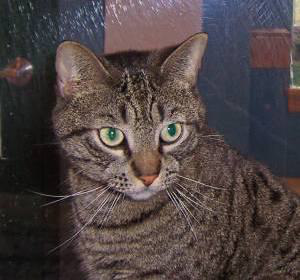

In [86]:
ds2[0]['image']

In [94]:
print(ds2[0]['image'])

#dataset = dataset.map(lambda example: {"fname": example['image'].filename.split("/")[-1]})


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x280 at 0x7FD8F5658CD0>


# Get data

In [2]:
inspect(datasets.Image, help=True)


╭───────────────────────── <class 'datasets.features.image.Image'> ─────────────────────────╮
│ class Image(decode: bool = True, id: Optional[str] = None) -> None:                       │
│                                                                                           │
│ Image feature to read image data from an image file.                                      │
│                                                                                           │
│ Input: The Image feature accepts as input:                                                │
│ - A :obj:`str`: Absolute path to the image file (i.e. random access is allowed).          │
│ - A :obj:`dict` with the keys:                                                            │
│                                                                                           │
│     - path: String with relative path of the image file to the archive file.              │
│     - bytes: Bytes of the image file.                                                     │
│                                                                                           │
│   This is useful for archived files with sequential access.                               │
│                                                                                           │
│ - An :obj:`np.ndarray`: NumPy array representing an image.                                │
│ - A :obj:`PIL.Image.Image`: PIL image object.                                             │
│                                                                                           │
│ Args:                                                                                     │
│     decode (:obj:`bool`, default ``True``): Whether to decode the image data. If `False`, │
│         returns the underlying dictionary in the format {"path": image_path, "bytes":     │
│ image_bytes}.                                                                             │
│                                                                                           │
│ Examples:                                                                                 │
│                                                                                           │
│ ```py                                                                                     │
│ >>> from datasets import load_dataset, Image                                              │
│ >>> ds = load_dataset("beans", split="train")                                             │
│ >>> ds.features["image"]                                                                  │
│ Image(decode=True, id=None)                                                               │
│ >>> ds[0]["image"]                                                                        │
│ <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x15E52E7F0>            │
│ >>> ds = ds.cast_column('image', Image(decode=False))                                     │
│ {'bytes': None,                                                                           │
│  'path': '/root/.cache/huggingface/datasets/downloads/extracted/b0a21163f78769a2cf11f58df │
│ c767fb458fc7cea5c05dccc0144a2c0f0bc1292/train/healthy/healthy_train.85.jpg'}              │
│ ```                                                                                       │
│                                                                                           │
│  decode = True                                                                            │
│   dtype = 'PIL.Image.Image'                                                               │
│      id = None                                                                            │
│ pa_type = StructType(struct<bytes: binary, path: string>)                                 │
╰───────────────────────────────────────────────────────────────────────────────────────────╯

In [3]:
from datasets import load_dataset
dataset = load_dataset("imagefolder", data_files="https://zenodo.org/record/6224034/files/embellishments_sample.zip?download=1")


Using custom data configuration default-a7d2f461a0badad3


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /home/kpmurphy/.cache/huggingface/datasets/imagefolder/default-a7d2f461a0badad3/0.0.0/e872d3ec27c6c200a8881a4af52930df7eca3372b19aa4d0f5db74a2fded8141. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 10000
})

In [4]:
dataset = dataset["train"]
dataset[0]


{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1780x281>,
 'label': 36}

In [6]:
dataset.features['label'] # class labels are years


ClassLabel(num_classes=210, names=['1540', '1593', '1602', '1607', '1623', '1630', '1631', '1633', '1634', '1635', '1636', '1637', '1638', '1639', '1640', '1641', '1643', '1648', '1656', '1661', '1662', '1664', '1665', '1670', '1675', '1681', '1683', '1688', '1689', '1690', '1691', '1695', '1704', '1710', '1714', '1716', '1717', '1718', '1719', '1720', '1721', '1722', '1723', '1724', '1725', '1727', '1728', '1729', '1730', '1731', '1732', '1733', '1734', '1735', '1736', '1737', '1738', '1739', '1740', '1742', '1743', '1744', '1746', '1747', '1748', '1749', '1750', '1751', '1753', '1754', '1755', '1756', '1757', '1759', '1760', '1761', '1762', '1765', '1766', '1767', '1768', '1769', '1770', '1771', '1772', '1773', '1774', '1775', '1776', '1777', '1778', '1780', '1781', '1782', '1783', '1785', '1787', '1788', '1789', '1791', '1792', '1794', '1795', '1796', '1797', '1798', '1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1809', '1810', '1811', '1812', '1814', '1815', '1816

In [7]:
dataset = dataset.map(lambda example: {"fname": example['image'].filename.split("/")[-1]})


  0%|          | 0/10000 [00:00<?, ?ex/s]

In [12]:
dataset[10]


{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1028x875>,
 'label': 154,
 'fname': '001571496_0_000225_1_[A Week at Killarney ]_1850.jpg'}

In [36]:
img = dataset[10]['image']
print(img)


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1028x875 at 0x7FD8FDAB3370>


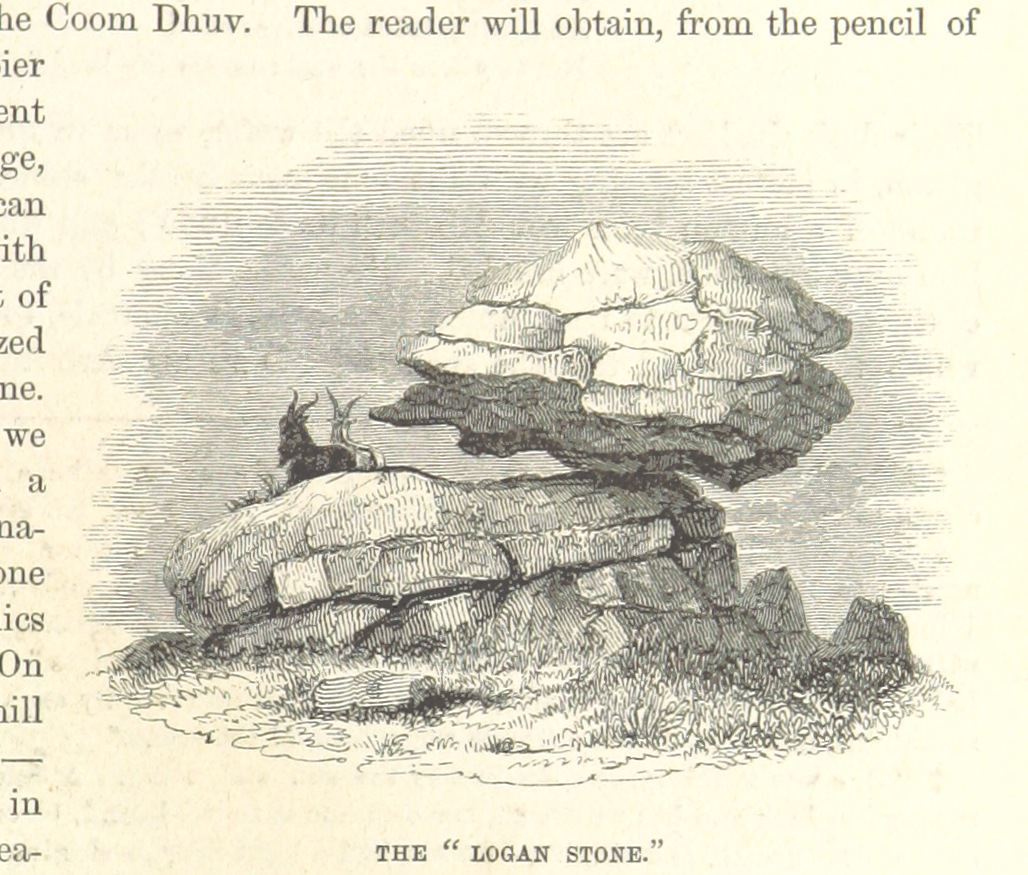

In [11]:
dataset[10]['image']


In [32]:
def transforms(examples):
    examples["pixel_values"] = [image.convert("RGB").resize((100,100)) for image in examples["image"]]
    return examples

ds_small = dataset.select(range(0,5))
print(ds_small)
ds_small = ds_small.map(transforms, batched=True)
print(ds_small)

Dataset({
    features: ['image', 'label', 'fname'],
    num_rows: 5
})


  0%|          | 0/1 [00:00<?, ?ba/s]

Dataset({
    features: ['image', 'label', 'fname', 'pixel_values'],
    num_rows: 5
})


In [34]:
ds_small.set_format("np", columns=["pixel_values"], output_all_columns=True)

In [35]:
x = ds_small[0]['pixel_values']
print(type(x))
print(x.shape)

<class 'PIL.PngImagePlugin.PngImageFile'>


AttributeError: shape

# Embedding

In [15]:
import jax
jax.devices()

[TpuDevice(id=0, process_index=0, coords=(0,0,0), core_on_chip=0),
 TpuDevice(id=1, process_index=0, coords=(0,0,0), core_on_chip=1),
 TpuDevice(id=2, process_index=0, coords=(1,0,0), core_on_chip=0),
 TpuDevice(id=3, process_index=0, coords=(1,0,0), core_on_chip=1),
 TpuDevice(id=4, process_index=0, coords=(0,1,0), core_on_chip=0),
 TpuDevice(id=5, process_index=0, coords=(0,1,0), core_on_chip=1),
 TpuDevice(id=6, process_index=0, coords=(1,1,0), core_on_chip=0),
 TpuDevice(id=7, process_index=0, coords=(1,1,0), core_on_chip=1)]

In [13]:
from sentence_transformers import SentenceTransformer

# https://huggingface.co/sentence-transformers/clip-ViT-B-32

model = SentenceTransformer('clip-ViT-B-32')


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/605M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/604 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/961k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.88k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [25]:
model

SentenceTransformer(
  (0): CLIPModel()
)

In [16]:
%%time
ds_with_embeddings = dataset.map(
    lambda example: {'embeddings':model.encode(example['image'], device='tpu')}, batched=True, batch_size=32)


  0%|          | 0/313 [00:00<?, ?ba/s]

RuntimeError: Expected one of cpu, cuda, ipu, xpu, mkldnn, opengl, opencl, ideep, hip, ve, ort, mps, xla, lazy, vulkan, meta, hpu, privateuseone device type at start of device string: tpu

In [17]:
%%time
ds_with_embeddings = dataset.map(
    lambda example: {'embeddings':model.encode(example['image'], device='xla')}, batched=True, batch_size=32)


  0%|          | 0/313 [00:00<?, ?ba/s]

RuntimeError: PyTorch is not linked with support for xla devices

In [18]:
ds_small = dataset.select(range(0,5))
print(ds_small)

Dataset({
    features: ['image', 'label', 'fname'],
    num_rows: 5
})


In [19]:
%%time

ds_with_embeddings = ds_small.map(
    lambda example: {'embeddings':model.encode(example['image'], device='cpu')}, batched=True, batch_size=32)



  0%|          | 0/1 [00:00<?, ?ba/s]

CPU times: user 6.32 s, sys: 1.69 s, total: 8.01 s
Wall time: 1.48 s


In [23]:
x= ds_with_embeddings[0]['embeddings']
print(type(x))
print(type(x[0]))

<class 'list'>
<class 'float'>


In [30]:
time_per_ex = 1.48/5
time_total = 10000 * time_per_ex
print(time_total / 60) # 50 minutes

49.333333333333336


In [26]:

model16 = SentenceTransformer('clip-ViT-B-16');


Downloading:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.31k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/354 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/599M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/732 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/862k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.88k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/118 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

In [27]:
%%time

ds_with_embeddings_16 = ds_small.map(
    lambda example: {'embeddings':model16.encode(example['image'], device='cpu')}, batched=True, batch_size=32)


  0%|          | 0/1 [00:00<?, ?ba/s]

CPU times: user 7.9 s, sys: 1.56 s, total: 9.46 s
Wall time: 1.37 s


In [31]:
time_per_ex = 1.37/5
time_total = 10000 * time_per_ex
print(time_total / 60) # 50 minutes

45.666666666666664


# Cats and dogs 

Smaller dataset

In [41]:
# https://huggingface.co/datasets/Bingsu/Cat_and_Dog
# Version of kaggle data without duplicate images
from datasets import load_dataset

ds = load_dataset("Bingsu/Cat_and_Dog", split="train")
print(ds)

# https://huggingface.co/datasets/pcuenq/oxford-pets

/home/kpmurphy/mambaforge/lib/python3.10/site-packages/huggingface_hub/utils/_deprecation.py:97: FutureWarning: Deprecated argument(s) used in 'dataset_info': token. Will not be supported from version '0.12'.
  warnings.warn(message, FutureWarning)


Dataset({
    features: ['image', 'labels'],
    num_rows: 8000
})


In [42]:
ds_small = dataset.select(range(0,5))
print(ds_small)


Dataset({
    features: ['image', 'label', 'fname'],
    num_rows: 5
})


In [43]:
%%time

ds_with_embeddings = ds_small.map(
    lambda example: {'embeddings':model.encode(example['image'], device='cpu')}, batched=True, batch_size=32)


CPU times: user 783 ms, sys: 805 ms, total: 1.59 s
Wall time: 1.58 s


In [44]:
%%time

ds_with_embeddings = ds_small.map(
    lambda example: {'embeddings':model16.encode(example['image'], device='cpu')}, batched=True, batch_size=32)


  0%|          | 0/1 [00:00<?, ?ba/s]

CPU times: user 8.85 s, sys: 962 ms, total: 9.81 s
Wall time: 1.82 s


In [47]:
ds_with_embeddings.set_format("np", columns=["embeddings"], output_all_columns=True)

In [49]:
x = ds_with_embeddings[0]['embeddings']
print(type(x))
print(x.shape)

<class 'numpy.ndarray'>
(512,)


In [55]:
%%time

ds_with_embeddings = ds_small.map(
    lambda example: {'embeddings':model.encode(example['image'], device='cpu')}, batched=True, batch_size=32)


CPU times: user 798 ms, sys: 749 ms, total: 1.55 s
Wall time: 1.54 s


In [56]:
ds_with_embeddings

Dataset({
    features: ['image', 'label', 'fname', 'embeddings'],
    num_rows: 5
})

In [54]:
from huggingface_hub import notebook_login

notebook_login()


In [59]:
dataset.push_to_hub('murphyk/cats-dogs-clip-embedding-n5')


/home/kpmurphy/mambaforge/lib/python3.10/site-packages/huggingface_hub/utils/_deprecation.py:97: FutureWarning: Deprecated argument(s) used in 'dataset_info': token. Will not be supported from version '0.12'.
  warnings.warn(message, FutureWarning)


  0%|          | 0/4 [00:00<?, ?ba/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

In [53]:
%%time

ds_with_embeddings = ds_small.map(
    lambda example: {'embeddings':model.encode(example['image'], device='cpu')}, batched=True, batch_size=32, num_proc=5)


#0:   0%|          | 0/1 [00:00<?, ?ba/s]

#1:   0%|          | 0/1 [00:00<?, ?ba/s]

#2:   0%|          | 0/1 [00:00<?, ?ba/s]

#4:   0%|          | 0/1 [00:00<?, ?ba/s]

#3:   0%|          | 0/1 [00:00<?, ?ba/s]

https://symbolize.stripped_domain/r/?trace=https://symbolize.stripped_domain/r/?trace=https://symbolize.stripped_domain/r/?trace=55e65dab574b,55e65dab65a3,7fe72db0641f,7fe72db0641f,https://symbolize.stripped_domain/r/?trace=55e65dab573b,7fe72db0641f,55e65dcfa83f55e65dcfe93f55e65dabaca2,55e65dcfe93f7fe72db0641f,&map=&map=&map=55e65dcfa83f&map= 
 
 
 
*** SIGTERM received by PID 1195223 (TID 1195223) on cpu 21 from PID 1186783; stack trace: ***
*** SIGTERM received by PID 1195221 (TID 1195221) on cpu 0 from PID 1186783; stack trace: ***
*** SIGTERM received by PID 1195222 (TID 1195222) on cpu 71 from PID 1186783; stack trace: ***
*** SIGTERM received by PID 1195224 (TID 1195224) on cpu 70 from PID 1186783; stack trace: ***
https://symbolize.stripped_domain/r/?trace=55e65dab20a9,7fe72db0641f,55e65dd1cd9f&map= 
*** SIGTERM received by PID 1195225 (TID 1195225) on cpu 53 from PID 1186783; stack trace: ***
PC: @     0x55e65dab573b  (unknown)  _PyEval_MakeFrameVector
PC: @     0x55e65dab574b 

CPU times: user 3.97 s, sys: 4.13 s, total: 8.09 s
Wall time: 16.7 s


In [50]:
ds_small.map?

Signature:
ds_small.map(
    function: Optional[Callable] = None,
    with_indices: bool = False,
    with_rank: bool = False,
    input_columns: Union[str, List[str], NoneType] = None,
    batched: bool = False,
    batch_size: Optional[int] = 1000,
    drop_last_batch: bool = False,
    remove_columns: Union[str, List[str], NoneType] = None,
    keep_in_memory: bool = False,
    load_from_cache_file: bool = None,
    cache_file_name: Optional[str] = None,
    writer_batch_size: Optional[int] = 1000,
    features: Optional[datasets.features.features.Features] = None,
    disable_nullable: bool = False,
    fn_kwargs: Optional[dict] = None,
    num_proc: Optional[int] = None,
    suffix_template: str = '_{rank:05d}_of_{num_proc:05d}',
    new_fingerprint: Optional[str] = None,
    desc: Optional[str] = None,
) -> 'Dataset'
Docstring:
Apply a function to all the examples in the table (individually or in batches) and update the table.
If your function returns a column that already exists

# PUsh to hub

In [60]:
ds_with_embeddings

Dataset({
    features: ['image', 'label', 'fname', 'embeddings'],
    num_rows: 5
})

In [61]:
#huggingface-cli login

#https://huggingface.co/docs/datasets/upload_dataset

# https://huggingface.co/datasets/murphyk/dogs-cats-small-clip-embedding

ds_with_embeddings.push_to_hub('murphyk/dogs-cats-small-clip-embedding')



/home/kpmurphy/mambaforge/lib/python3.10/site-packages/huggingface_hub/utils/_deprecation.py:97: FutureWarning: Deprecated argument(s) used in 'dataset_info': token. Will not be supported from version '0.12'.
  warnings.warn(message, FutureWarning)


  0%|          | 0/1 [00:00<?, ?ba/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

In [62]:
from datasets import load_dataset

dataset = load_dataset('murphyk/dogs-cats-small-clip-embedding') #, use_auth_token=True)



/home/kpmurphy/mambaforge/lib/python3.10/site-packages/huggingface_hub/utils/_deprecation.py:97: FutureWarning: Deprecated argument(s) used in 'dataset_info': token. Will not be supported from version '0.12'.
  warnings.warn(message, FutureWarning)


Downloading:   0%|          | 0.00/6.49k [00:00<?, ?B/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset parquet downloaded and prepared to /home/kpmurphy/.cache/huggingface/datasets/murphyk___parquet/murphyk--dogs-cats-small-clip-embedding-406c8c110931b881/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [63]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label', 'fname', 'embeddings'],
        num_rows: 5
    })
})